## **QUESTION 1**

- On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

  1. Think about what could be going wrong with our calculation.Think about a better way to evaluate this data. 
  2. What metric would you report for this dataset?
  3. What is its value?


---



# **Answers**
1. Its very obvious that the average order value of \$3145 is wrong because after inspecting the data set, we can say the price of sneakers ranges from \$100 \- \$1000 . Now using the pandas groupby function to group the dataset by date and using the mean function on it, we obtain the mean of sneakers sold per day through 30days.

2. Root Mean Squared Metric

3. 230.09187

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from datetime import datetime as dt

df = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv",parse_dates=['created_at'],dayfirst=True,index_col='created_at')

In [ ]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-13 12:36:56,1,53,746,224,2,cash
2017-03-03 17:38:52,2,92,925,90,1,cash
2017-03-14 04:23:56,3,44,861,144,1,cash
2017-03-26 12:43:37,4,18,935,156,1,credit_card
2017-03-01 04:35:11,5,18,883,156,1,credit_card
...,...,...,...,...,...,...
2017-03-30 13:47:17,4996,73,993,330,2,debit
2017-03-16 20:36:16,4997,48,789,234,2,cash
2017-03-19 05:42:42,4998,56,867,351,3,cash


In [ ]:
print(df.shop_id.value_counts()[:50])

53    68
71    66
19    64
13    63
89    61
69    60
59    60
9     59
93    59
58    59
70    59
41    59
81    59
84    59
6     59
98    58
73    58
43    58
14    58
29    58
45    58
63    58
30    56
7     56
23    55
2     55
24    55
91    54
79    54
65    54
27    54
99    54
12    53
17    53
66    53
49    53
57    53
10    53
86    52
35    52
15    52
87    52
20    52
18    51
96    51
42    51
4     51
36    50
61    50
77    50
Name: shop_id, dtype: int64


In [ ]:
df['each_amount'] = df['order_amount'] /df['total_items']

In [ ]:
df.index = df.index.date


In [ ]:
df = df.sort_index()

In [ ]:
sum(df.groupby(df.index).mean()['each_amount'])/30

386.2740412554092

In [ ]:
shop_df = df.groupby('shop_id').mean()

In [ ]:
aov_df

,order_id,shop_id,user_id,order_amount,total_items,each_amount,revenue
created_at,,,,,,,
2017-03-01,2600.379121,47.604396,846.532967,583.263736,1.972527,294.532967,1.297066e+03
2017-03-02,2476.956044,50.406593,844.791209,8725.873626,23.906593,573.500000,1.547449e+07
2017-03-03,2508.481481,48.290123,840.067901,300.796296,2.000000,149.086420,7.432778e+02
2017-03-04,2339.878788,54.139394,865.460606,5184.872727,14.018182,312.309091,8.536540e+06
2017-03-05,2434.128834,53.447853,846.588957,774.803681,1.963190,311.539877,2.140853e+03
2017-03-06,2305.682432,52.290541,844.270270,285.581081,1.871622,151.567568,6.722297e+02
2017-03-07,2457.234694,51.515306,849.989796,7478.826531,22.336735,156.086735,1.436808e+07
2017-03-08,2346.756410,46.461538,854.455128,278.410256,1.839744,149.865385,6.344359e+02
2017-03-09,2521.206030,50.391960,856.507538,961.241206,2.105528,409.110553,2.484095e+03


In [ ]:
predicted_mean = sum(aov_df['each_amount'])/30

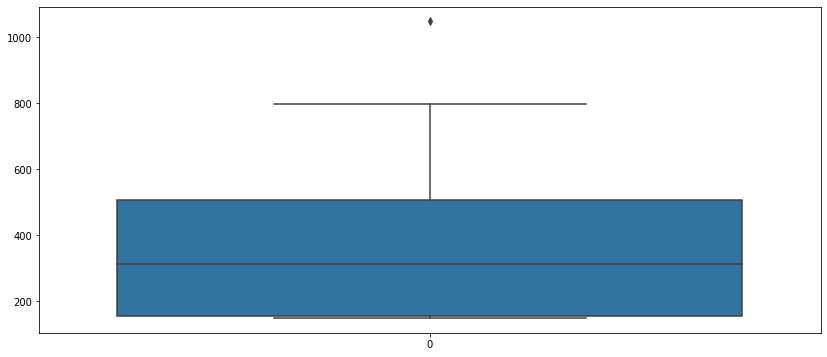

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=aov_df['each_amount'])

In [ ]:
aov_df['error'] = aov_df['each_amount'] - predicted_mean

In [ ]:
aov_df['error'] = aov_df['error']**2

In [ ]:
aov_df

,order_id,shop_id,user_id,order_amount,total_items,each_amount,revenue,error
created_at,,,,,,,,
2017-03-01,2600.379121,47.604396,846.532967,583.263736,1.972527,294.532967,1.297066e+03,8416.424699
2017-03-02,2476.956044,50.406593,844.791209,8725.873626,23.906593,573.500000,1.547449e+07,35053.559628
2017-03-03,2508.481481,48.290123,840.067901,300.796296,2.000000,149.086420,7.432778e+02,56257.967794
2017-03-04,2339.878788,54.139394,865.460606,5184.872727,14.018182,312.309091,8.536540e+06,5470.813880
2017-03-05,2434.128834,53.447853,846.588957,774.803681,1.963190,311.539877,2.140853e+03,5585.195262
2017-03-06,2305.682432,52.290541,844.270270,285.581081,1.871622,151.567568,6.722297e+02,55087.128791
2017-03-07,2457.234694,51.515306,849.989796,7478.826531,22.336735,156.086735,1.436808e+07,52986.196102
2017-03-08,2346.756410,46.461538,854.455128,278.410256,1.839744,149.865385,6.344359e+02,55889.052934
2017-03-09,2521.206030,50.391960,856.507538,961.241206,2.105528,409.110553,2.484095e+03,521.506258


In [ ]:
root_mean_squared_error = np.sqrt(sum(aov_df['error'])/30)

In [ ]:
root_mean_squared_error

230.09186714444996

**QUESTION 2**

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?



# **Answers**

1. 54

>> SELECT count(OrderId) FROM Orders INNER JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
where ShipperName = 'Speedy Express';


2. Peacock

>> select LastName,count(LastName) as Orderss from Employees left join Orders on Employees.EmployeeID = Orders.EmployeeID
  group by LastName
   order by Orderss DESC



3. Gumbär Gummibärchen

>> SELECT ProductName,MAX(Quantity) as pdts FROM Products join OrderDetails on Products.ProductID = OrderDetails.ProductID
join Suppliers on Products.SupplierID = Suppliers.SupplierID
where Suppliers.Country = 'Germany'
 group by ProductName
 order by pdts DESC

**THANK YOU**